In [13]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# August 2024
# License: MIT

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

In [33]:
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split


np.random.seed(42)

X, y = make_blobs(n_samples=150, centers=2, cluster_std=3.5, random_state=42)

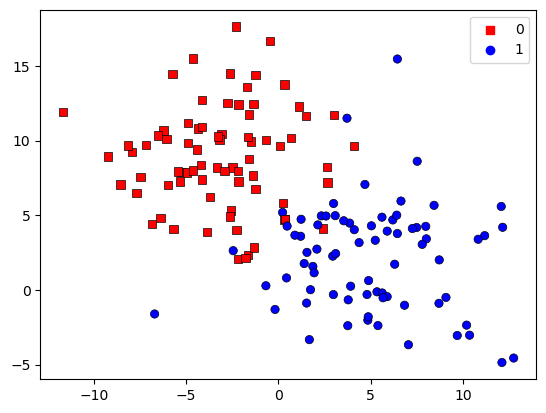

In [34]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y, markers=('s', 'o'), 
                palette=('r', 'b'), edgecolor='black')
plt.savefig('figures/blobs_dataset.pdf')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

<Axes: >

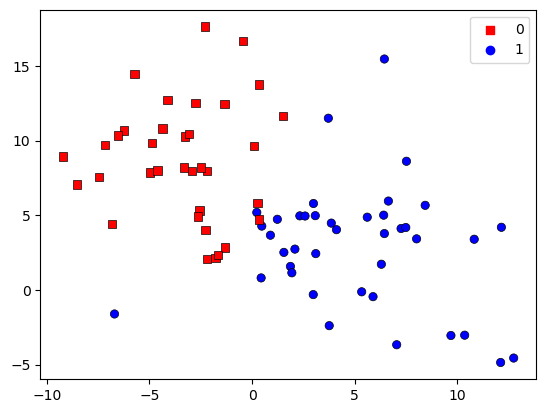

In [36]:
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, style=y_test, markers=('s', 'o'), 
                palette=('r', 'b'), edgecolor='black')

<Axes: >

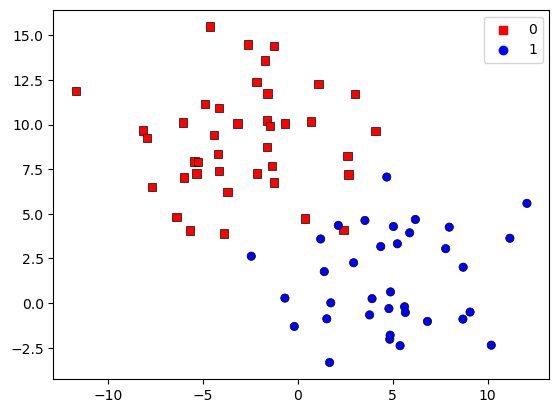

In [37]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, style=y_train, markers=('s', 'o'), 
                palette=('r', 'b'), edgecolor='black')

In [38]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(classifier, X, y, feature_names, class_labels, ax=None, legend='auto'):
    """Plot the decision boundaries of a classifier along with the dataset points.

    Parameters:
    - classifier: The trained classifier.
    - X: Feature dataset.
    - y: Target labels.
    - feature_names: List of feature names for labeling the axes.
    - class_labels: List of class labels for coloring the points.
    - ax: Matplotlib Axes object where the plot is drawn. If None, uses current axis.
    - legend: Controls the drawing of the legend. Use False to disable the legend.
    """
    if ax is None:
        ax = plt.gca()
        
    # Define colors and markers
    colors = ['red', 'cyan', 'blue']
    markers = ['s', 'o', '^']
    cmap = ListedColormap(colors[:len(class_labels)])

    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y, ax=ax)
      
    # Setup mesh grid parameters
    # resolution = 250  # Number of sample points in each axis
    # x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    # y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1     
    # xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution), 
    #                      np.linspace(y_min, y_max, resolution))
    
    # # Classify each point in the mesh grid
    # z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    # z = z.reshape(xx.shape) 

    # Create grid to evaluate model    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()    
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    XX, YY = np.meshgrid(xx, yy)
    xy = np.column_stack([XX.ravel(), YY.ravel()])
    Z = model.decision_function(xy).reshape(XX.shape)
    
    # Plot the decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, 
               linestyles=['--', '-', '--'])
    
    # Generate contour plot
    #ax.contourf(xx, yy, z, cmap=cmap, alpha=0.4)    
    
    # Plot the training points
    #sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=class_labels[y], style=class_labels[y], 
    #                hue_order=class_labels, style_order=class_labels,
    #                palette=colors, markers=markers, edgecolor='k', ax=ax, legend=legend)
    

    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])    

0.01 0.9466666666666667 0.9066666666666666
0.1 0.9733333333333334 0.92
1 0.9733333333333334 0.8933333333333333


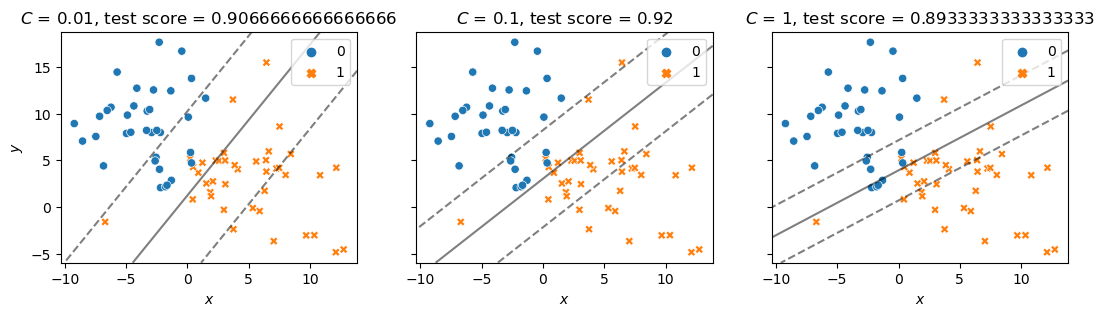

In [39]:
from sklearn.svm import LinearSVC, SVC
fig, axes = plt.subplots(1, 3, figsize=(13, 3), sharey=True)

for ax, C in zip(axes, [0.01, 0.1, 1]):
#for ax, C in zip(axes, [0.1, 0.2, 0.5, 1.0]):
    #ax.scatter(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], c='red', s=50, label='0')
    #ax.scatter(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], c='blue', s=50, label='1')
    model = LinearSVC(C=C, random_state=42)
    #model = SVC(kernel='linear', C=C, random_state=42)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(C, train_score, test_score)
    plot_decision_boundaries(model, X_test, y_test, ['$x$', '$y$'], ['aa', 'bb'], ax)
    ax.set_title(f'$C$ = {C}, test score = {test_score}')

plt.savefig('figures/svm_soft_margin.pdf')